In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Carregar os dados
df = pd.read_csv("../data/commerce_dataset.csv", sep=";")

## ARMA

ADF Statistic: -7.654895726803345
p-value: 1.7495640309589474e-11
Critical Value 1%: -3.5078527246648834
Critical Value 5%: -2.895382030636155
Critical Value 10%: -2.584823877658872

A série é estacionária. Podemos proceder com a modelagem ARMA.


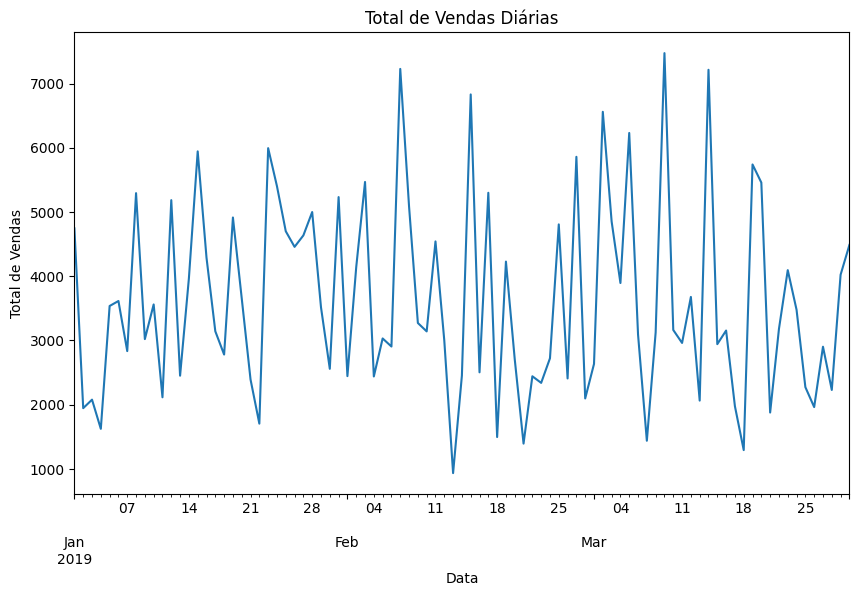

In [9]:

# Converter a coluna 'dtme' para datetime e definir como índice
df['dtme'] = pd.to_datetime(df['dtme'])
df.set_index('dtme', inplace=True)

# Agregar os dados para obter o total de vendas por dia
daily_sales = df['total'].resample('D').sum()

# Verificar a estacionariedade da série
adf_test = adfuller(daily_sales)

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

# Se a série não for estacionária, diferenciaremos. Caso contrário, procederemos com a modelagem ARMA.
if adf_test[1] > 0.05:
    print("\nA série não é estacionária. Será necessário diferenciar.")
else:
    print("\nA série é estacionária. Podemos proceder com a modelagem ARMA.")

# Plotar a série temporal
plt.figure(figsize=(10, 6))
daily_sales.plot(title='Total de Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()

## Treinar o modelo - ARMA

In [10]:
# Converter a coluna 'dtme' para datetime e definir como índice
df['dtme'] = pd.to_datetime(df['dtme'])
df.set_index('dtme', inplace=True)

# Agregar os dados para obter o total de vendas por dia
daily_sales = df['total'].resample('D').sum()

# Verificar a estacionariedade da série
adf_test = adfuller(daily_sales)

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

# Se a série não for estacionária, diferenciaremos. Caso contrário, procederemos com a modelagem ARMA.
if adf_test[1] > 0.05:
    print("\nA série não é estacionária. Será necessário diferenciar.")
else:
    print("\nA série é estacionária. Podemos proceder com a modelagem ARMA.")

# Plotar a série temporal
plt.figure(figsize=(10, 6))
daily_sales.plot(title='Total de Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()

KeyError: 'dtme'

In [ ]:
# Definir o período de previsão
n_periods = 7

# Realizar previsões
forecast = model_arma_fit.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotar as previsões juntamente com os dados históricos
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales, label='Dados Históricos')
plt.plot(forecast_index, forecast_mean, color='red', label='Previsões')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Previsão de Vendas Futuras com Modelo ARMA')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.show()
